In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.backend.Logger import Logger


In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": False
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
site = 'PA'
# site = 'PA'

if site == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2018, 2019, 2020]

elif site == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2019, 2020, 2021]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		# exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		# exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': False}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

In [7]:
trainer.classes_mode

False

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

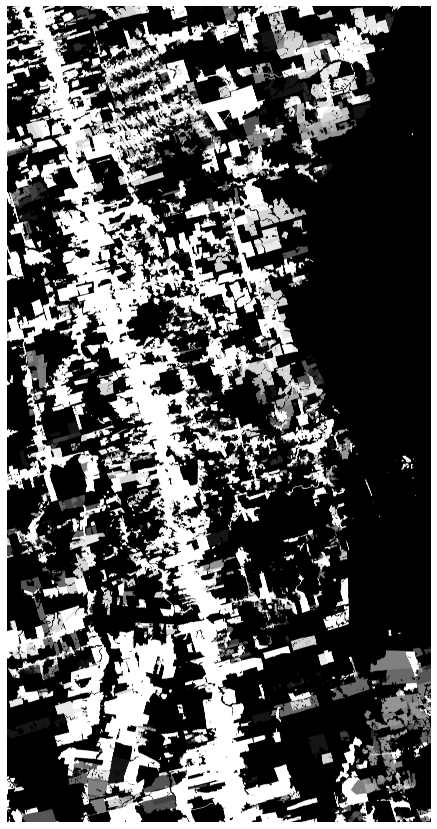

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(17730, 9200, 21)

In [48]:
trainer.setPadding()

-30.0 -16.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.500655e-16
    np.mean(value): 0.014949512
    np.max(value): 0.9961816


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [57]:
trainer.unpadMeanProb()

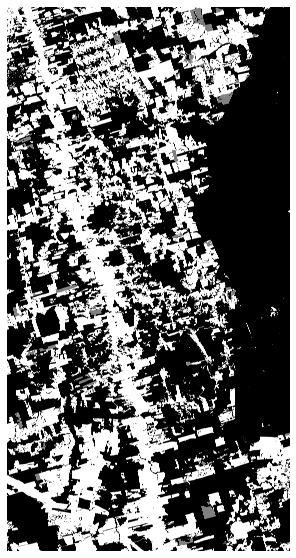

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

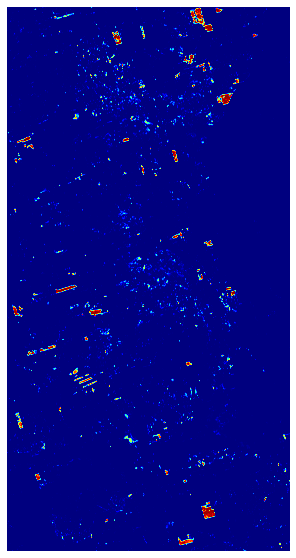

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(17730, 9200)


In [62]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [66]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.014945002
    np.max(value): 0.9999957


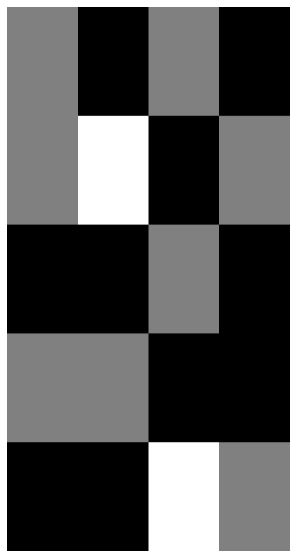

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161368428,   1747572], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162939911,    176089], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 85.77, self.precision: 88.45, self.recall: 83.24


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431485,)
ic| f1_val: 87.05
    precision_val: 84.03
    recall_val: 90.3
    mAP_val: 92.71


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162560284,    555716], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


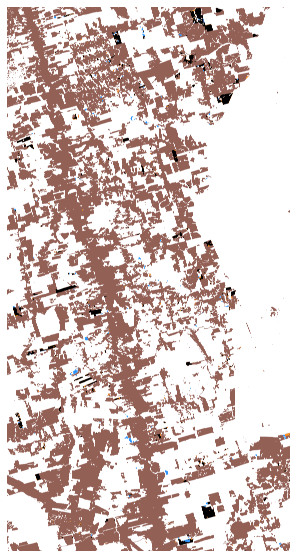

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [82]:
trainer.setUncertainty()

K shape 1, pred_mean shape (17760, 9216, 1)


In [83]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [84]:
trainer.uncertainty_map.shape

(17760, 9216)

In [85]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): 1.4894663e-14
    np.mean(value): 0.030029478
    np.max(value): 1.0


In [86]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.026422098
    np.max(value): 1.0


In [87]:
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.026422098
    np.max(value): 1.0


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

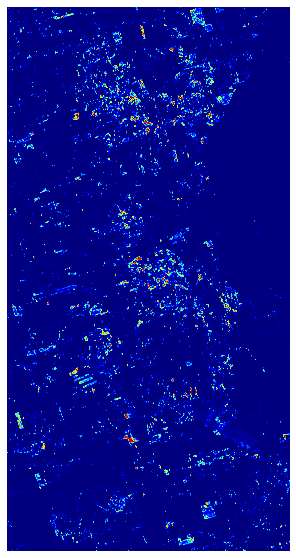

In [88]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



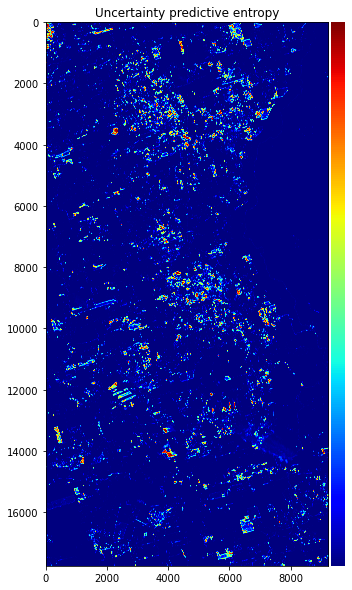

In [89]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [90]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54147114,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


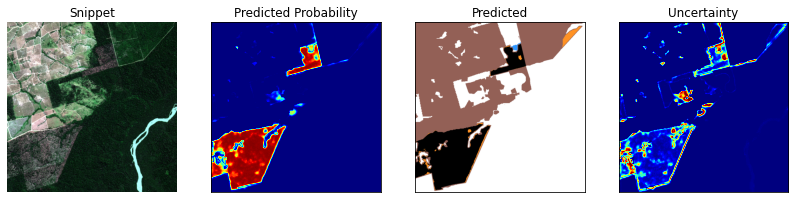

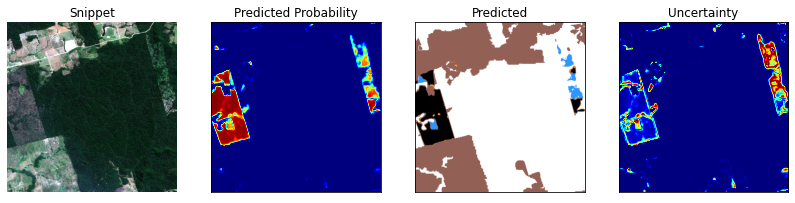

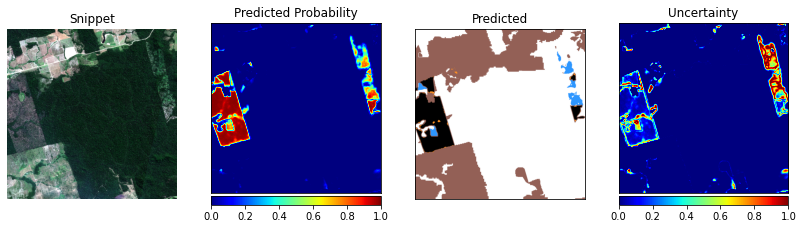

In [91]:
trainer.logger.plotCropSample(trainer)

In [92]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 3.3348473e-09
    np.mean(value): 0.036087636
    np.max(value): 1.0


In [93]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


In [94]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([104050616,   2209014,  56856370], dtype=int64))

In [95]:
label_tmp_dates[0].shape

(17730, 9200)

In [96]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif


In [97]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([160906986,   2209014], dtype=int64))

In [98]:
ims[0].shape

(17730, 9200, 3)

In [99]:
trainer.classes_mode

False

In [100]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [101]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [102]:
import src.backend.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


[(17730, 9200, 3), (17730, 9200, 3), (17730, 9200, 3), (17730, 9200), (17730, 9200, 3), (17730, 9200)]
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


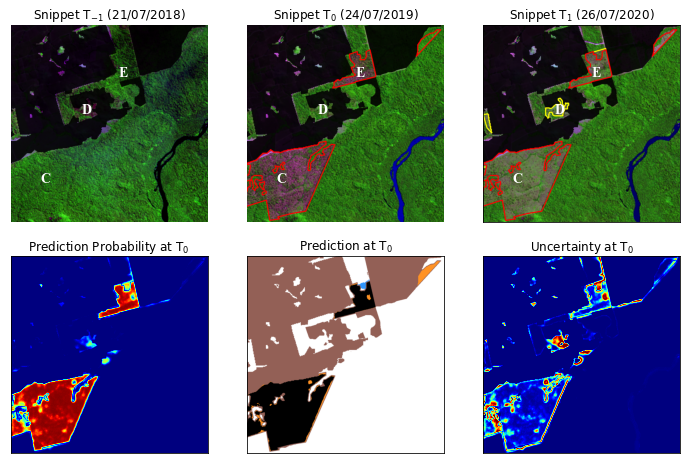

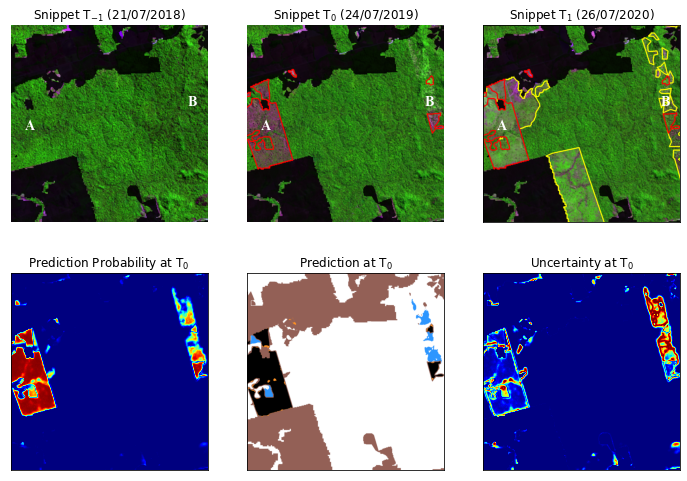

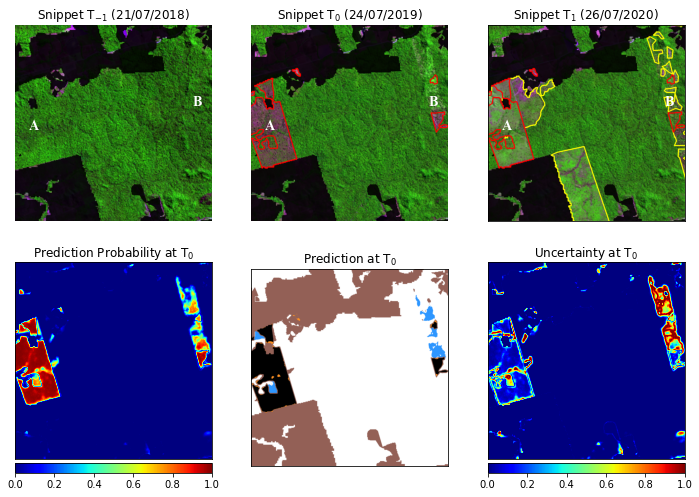

In [103]:
logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


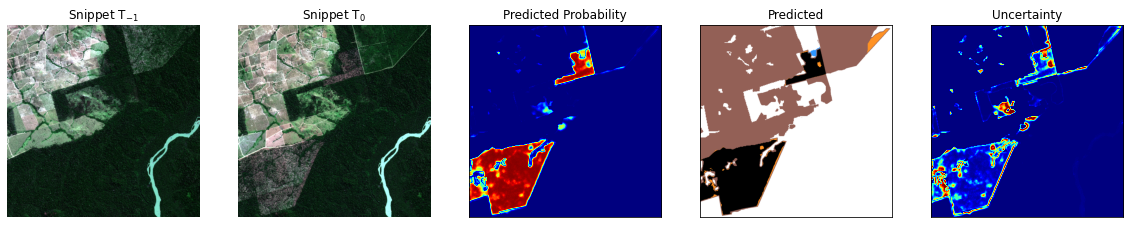

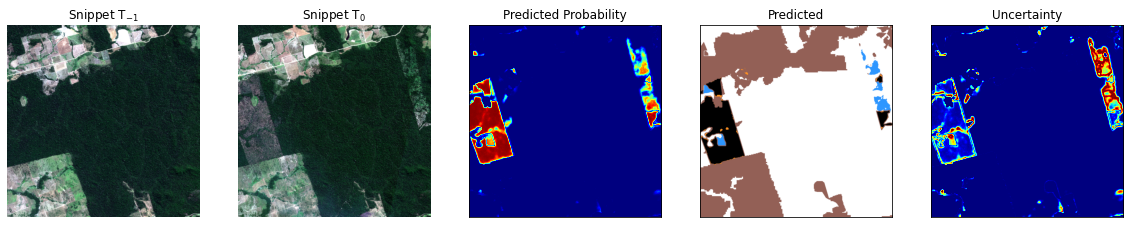

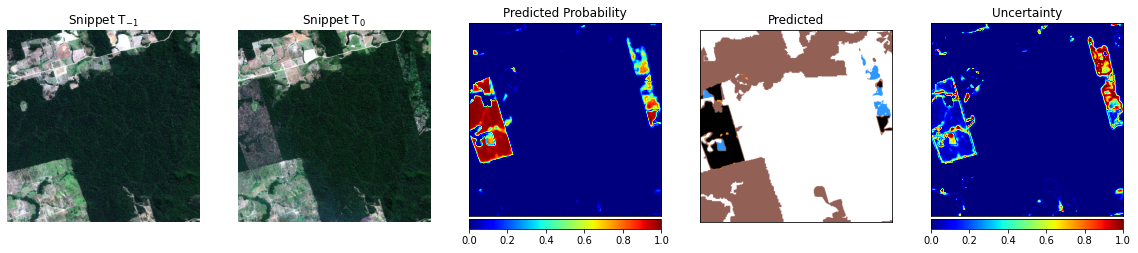

In [104]:
logger.plotCropSampleT0T1(trainer)

In [105]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [106]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [107]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 3.3348473e-09
    np.mean(value): 0.036087636
    np.max(value): 1.0


In [108]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [109]:
trainer.uncertainty.shape

(54147114,)

In [110]:
np.mean(trainer.mean_prob)

0.01406089

In [111]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

(17730, 9200)
[[550, 115], [430, 950]]


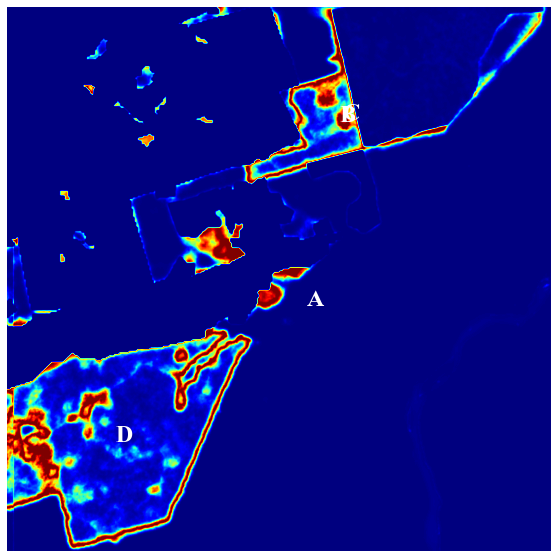

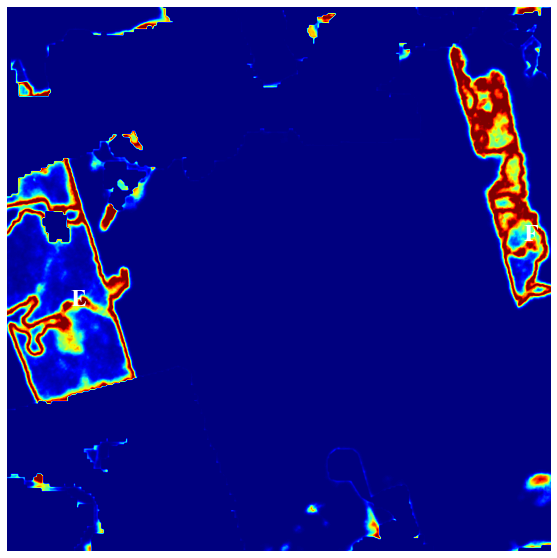

In [112]:
print(trainer.mean_prob.shape)
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 24,
        }

lims = dataset.previewLims1
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['A', 'B', 'C', 'D', 'E', 'F']

for poi_id in range(4):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')

plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

lims = dataset.previewLims2
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['E', 'F']

print(trainer.dataset.snippet_coords['snippet_id1'])
for poi_id in range(2):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')
        
plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [113]:
'''
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')
'''

"\nprint(trainer.mean_prob.shape)\n\nlims = dataset.previewLims1\nim = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]\nplt.figure(figsize=(15,15))\nplt.imshow(im, cmap='jet')\n"

In [114]:
'''
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results
'''

'\ndef getPOIValues(self):\n    self.snippet_poi_results = []\n\n    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]\n    for snippet_id, lims in enumerate(lims_snippets):\n        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:\n            dict_ = {"snippet_id": snippet_id,\n                    "coords": coord, # 10,1 alpha\n                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}\n            \n            predicted_coord = []\n            for idx in range(self.prob_rec.shape[0]):\n                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])\n            predicted_coord = np.array(predicted_coord)\n            dict_["predicted"] = predicted_coord\n\n            self.snippet_poi_results.append(dict_)\n\n    return self.snippet_poi_results\n'

In [115]:

'''
import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)
'''


'\nimport types\n\ntrainer.getPOIValues = types.MethodType(getPOIValues, trainer)\n'

In [116]:

trainer.getPOIValues()


[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([[2.48296004e-07],
         [4.16432844e-09],
         [1.68376213e-09],
         [2.36679583e-07],
         [3.45382723e-05],
         [3.84681698e-06],
         [1.00834685e-13],
         [1.32610875e-11],
         [1.66440691e-06],
         [8.39343954e-08]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([[0.4554153 ],
         [0.4598863 ],
         [0.30445483],
         [0.5327956 ],
         [0.46919134],
         [0.5441637 ],
         [0.150321  ],
         [0.36867702],
         [0.59043163],
         [0.4161476 ]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [207, 617],
  'reference': 1,
  'predicted': array([[0.16695404],
         [0.27290606],
         [0.06870116],
         [0.17027362],
         [0.29472125],
         [0.2686468 ],
         [0.08341189],
         [0.23350567],
         [0.33091488],
         [0.13750772]], dtype=float

In [117]:

import pickle
with open('output/log/log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


In [118]:
def getUncertaintyAAValues(self):



        # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

        # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
        if self.config['uncertainty_method'] == "pred_entropy":
                if self.classes_mode == False:
                        self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                                0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                                0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                else:
                        self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                        0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
        elif self.config['uncertainty_method'] == "pred_var":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
        elif self.config['uncertainty_method'] == "MI":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
        elif self.config['uncertainty_method'] == "KL":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
        elif self.config['uncertainty_method'] == "evidential":
                # self.threshold_list = [0.015, 0.03, 0.04]
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                # self.threshold_list = [ 0.15, 0.2,  
                #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

                # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

                # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                        
                # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
        print(self.threshold_list)
        self.loadThresholdMetrics = False
        if self.loadThresholdMetrics == False:
                # self.threshold_list = [0.1]
                # y_test
                ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

                metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, self.threshold_list)

                # ic(metrics_values)


        self.m = {'precision_L': metrics_values[:,0],
                'recall_L': metrics_values[:,1],
                'recall_Ltotal': metrics_values[:,2],
                'AA': metrics_values[:,3],
                'precision_H': metrics_values[:,4],
                'recall_H': metrics_values[:,5],
                'UEO': metrics_values[:,6]}

        self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
        self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [119]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)


Get precision-recall threshold

In [120]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


[0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.997, 0.9985]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (10439497,)
    predicted_test_classified_incorrect.shape: (10439497,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 10439497
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 10439497
    len(label_mask_current_deforestation_test): 54147114


[       nan 0.         0.         0.19279877 0.884497   0.83688903
 0.01904935]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (5835580,)
    predicted_test_classified_incorrect.shape: (5835580,)
ic| TP_H + FN_H + FP_H + TN_H: 5835580
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 5835580
    len(label_mask_current_deforestation_test): 54147114


[1.         0.62175442 0.01637214 0.10777269 0.88245214 0.83813703
 0.03346476]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (4674172,)
    predicted_test_classified_incorrect.shape: (4674172,)
ic| TP_H + FN_H + FP_H + TN_H: 4674172
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4674172
    len(label_mask_current_deforestation_test): 54147114


[1.         0.91220508 0.12479792 0.08632357 0.86683962 0.81979693
 0.04143185]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (3677385,)
    predicted_test_classified_incorrect.shape: (3677385,)
ic| TP_H + FN_H + FP_H + TN_H: 3677385
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 3677385
    len(label_mask_current_deforestation_test): 54147114


[0.99999036 0.95060009 0.28262886 0.0679147  0.8349276  0.78244352
 0.05207405]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (2754437,)
    predicted_test_classified_incorrect.shape: (2754437,)
ic| TP_H + FN_H + FP_H + TN_H: 2754437
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2754437
    len(label_mask_current_deforestation_test): 54147114


[0.99809935 0.95915407 0.44128651 0.05086951 0.78384589 0.72446264
 0.06805311]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (1846390,)
    predicted_test_classified_incorrect.shape: (1846390,)
ic| TP_H + FN_H + FP_H + TN_H: 1846390
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1846390
    len(label_mask_current_deforestation_test): 54147114


[0.98767711 0.95749273 0.6011495  0.03409951 0.69561994 0.62147445
 0.09497342]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1546056,)
    predicted_test_classified_incorrect.shape: (1546056,)
ic| TP_H + FN_H + FP_H + TN_H: 1546056
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1546056
    len(label_mask_current_deforestation_test): 54147114


[0.97903975 0.95462384 0.65136775 0.02855288 0.65645723 0.56999721
 0.10758011]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (1293322,)
    predicted_test_classified_incorrect.shape: (1293322,)
ic| TP_H + FN_H + FP_H + TN_H: 1293322
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1293322
    len(label_mask_current_deforestation_test): 54147114


[0.96821155 0.95046422 0.69421098 0.02388534 0.61670272 0.51269979
 0.11936359]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (1066485,)
    predicted_test_classified_incorrect.shape: (1066485,)
ic| TP_H + FN_H + FP_H + TN_H: 1066485
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1066485
    len(label_mask_current_deforestation_test): 54147114


[0.9529839  0.94575795 0.73200133 0.01969606 0.58046818 0.44438352
 0.12947111]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (851813,)
    predicted_test_classified_incorrect.shape: (851813,)
ic| TP_H + FN_H + FP_H + TN_H: 851813
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 851813
    len(label_mask_current_deforestation_test): 54147114


[0.93534082 0.93982434 0.76584608 0.01573146 0.54425744 0.35973367
 0.13809164]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (641557,)
    predicted_test_classified_incorrect.shape: (641557,)
ic| TP_H + FN_H + FP_H + TN_H: 641557
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 641557
    len(label_mask_current_deforestation_test): 54147114


[0.91415783 0.93020136 0.79803469 0.01184841 0.50467495 0.24214219
 0.14024112]
threshold 0.997


ic| label_current_deforestation_test_classified_incorrect.shape: (410480,)
    predicted_test_classified_incorrect.shape: (410480,)
ic| TP_H + FN_H + FP_H + TN_H: 410480
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 410480
    len(label_mask_current_deforestation_test): 54147114


[0.88557882 0.91556647 0.83135508 0.00758083 0.45668388 0.01178683
 0.12404516]
threshold 0.9985


ic| label_current_deforestation_test_classified_incorrect.shape: (406365,)
    predicted_test_classified_incorrect.shape: (406365,)
ic| TP_H + FN_H + FP_H + TN_H: 406365
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 406365
    len(label_mask_current_deforestation_test): 54147114


[0.88504125 0.91524311 0.83193528 0.00750483 0.43890866 0.00553627
 0.12343391]


In [121]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


threshold 0.0025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    3904   730331]]
[1.        0.9946829]
threshold 0.025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    7313   726922]]
[1.         0.99003997]
threshold 0.05
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    8819   725416]]
[1.         0.98798886]
threshold 0.1
(54147114,) (54147114,)
cm_audited [[53412877        2]
 [   10784   723451]]
[0.99999724 0.9853126 ]
threshold 0.2
(54147114,) (54147114,)
cm_audited [[53412262      617]
 [   13798   720437]]
[0.99914431 0.98120765]
threshold 0.4
(54147114,) (54147114,)
cm_audited [[53407372     5507]
 [   19595   714640]]
[0.99235295 0.97331236]
threshold 0.5
(54147114,) (54147114,)
cm_audited [[53402640    10239]
 [   22733   711502]]
[0.98581347 0.96903852]
threshold 0.6
(54147114,) (54147114,)
cm_audited [[53396144    16735]
 [   26565   707670]]
[0.97689828 0.96381949]
threshold 0.7
(54147114,) (54147114,)
cm_audited [[53386363    26516

ic| metric_values_audited: array([[1.        , 0.9946829 ],
                                  [1.        , 0.99003997],
                                  [1.        , 0.98798886],
                                  [0.99999724, 0.9853126 ],
                                  [0.99914431, 0.98120765],
                                  [0.99235295, 0.97331236],
                                  [0.98581347, 0.96903852],
                                  [0.97689828, 0.96381949],
                                  [0.96367303, 0.95801753],
                                  [0.94726382, 0.95096393],
                                  [0.9261737 , 0.94011863],
                                  [0.89578904, 0.92333245],
                                  [0.89519029, 0.92295791]])


cm_audited [[53333537    79342]
 [   56567   677668]]
[0.89519029 0.92295791]


In [122]:
trainer.setPlotLimsForUncertaintyAA()

In [123]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [124]:
trainer.xlim


[-0.1, 10.4]

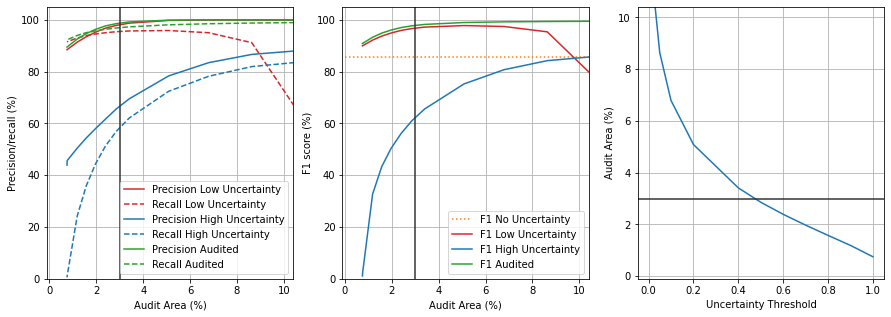

In [125]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

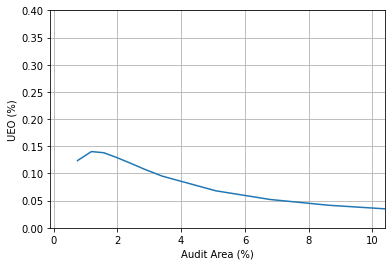

In [126]:
trainer.plotUEO()

In [127]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484


ic| label_current_deforestation_test_classified_incorrect.shape: (1905813,)
    predicted_test_classified_incorrect.shape: (1905813,)
ic| TP_H + FN_H + FP_H + TN_H: 1905813
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1905813
    len(label_mask_current_deforestation_test): 54147114


[0.98877587 0.95787062 0.59114316 0.03519695 0.70289142 0.63025111
 0.09266464]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (1251624,)
    predicted_test_classified_incorrect.shape: (1251624,)
ic| TP_H + FN_H + FP_H + TN_H: 1251624
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1251624
    len(label_mask_current_deforestation_test): 54147114


[0.96578508 0.94963104 0.70125913 0.02311525 0.6100221  0.501557
 0.12125812]
0.23685977356729035
threshold 0.23685977356729035


ic| label_current_deforestation_test_classified_incorrect.shape: (2532151,)
    predicted_test_classified_incorrect.shape: (2532151,)
ic| TP_H + FN_H + FP_H + TN_H: 2532151
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2532151
    len(label_mask_current_deforestation_test): 54147114


[0.99668485 0.95987283 0.48194379 0.04676428 0.76594719 0.7039351
 0.07333796]
0.4842495158406957
threshold 0.4842495158406957


ic| label_current_deforestation_test_classified_incorrect.shape: (1590110,)
    predicted_test_classified_incorrect.shape: (1590110,)
ic| TP_H + FN_H + FP_H + TN_H: 1590110
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1590110
    len(label_mask_current_deforestation_test): 54147114


[0.98071812 0.95516486 0.64381703 0.02936648 0.66260155 0.57866237
 0.10567448]
0.49078914924467154
threshold 0.49078914924467154


ic| label_current_deforestation_test_classified_incorrect.shape: (1571712,)
    predicted_test_classified_incorrect.shape: (1571712,)
ic| TP_H + FN_H + FP_H + TN_H: 1571712
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1571712
    len(label_mask_current_deforestation_test): 54147114


[0.9799646  0.95493074 0.64703944 0.0290267  0.6600769  0.57502091
 0.10643721]
0.45838740457921234
threshold 0.45838740457921234


ic| label_current_deforestation_test_classified_incorrect.shape: (1664733,)
    predicted_test_classified_incorrect.shape: (1664733,)
ic| TP_H + FN_H + FP_H + TN_H: 1664733
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1664733
    len(label_mask_current_deforestation_test): 54147114


[0.98342247 0.95602561 0.63157572 0.03074463 0.6719595  0.59186532
 0.10254386]
0.4743710683596405
threshold 0.4743710683596405


ic| label_current_deforestation_test_classified_incorrect.shape: (1618682,)
    predicted_test_classified_incorrect.shape: (1618682,)
ic| TP_H + FN_H + FP_H + TN_H: 1618682
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1618682
    len(label_mask_current_deforestation_test): 54147114


[0.98177619 0.95549516 0.63922858 0.02989415 0.66612824 0.58372217
 0.10445383]
0.47191337429169583
threshold 0.47191337429169583


ic| label_current_deforestation_test_classified_incorrect.shape: (1625633,)
    predicted_test_classified_incorrect.shape: (1625633,)
ic| TP_H + FN_H + FP_H + TN_H: 1625633
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1625633
    len(label_mask_current_deforestation_test): 54147114


[0.98203592 0.95557967 0.63806956 0.03002252 0.66701409 0.58497565
 0.10416545]
0.4667469135923288
threshold 0.4667469135923288


ic| label_current_deforestation_test_classified_incorrect.shape: (1640309,)
    predicted_test_classified_incorrect.shape: (1640309,)
ic| TP_H + FN_H + FP_H + TN_H: 1640309
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1640309
    len(label_mask_current_deforestation_test): 54147114


[0.98262806 0.95576901 0.63571881 0.03029356 0.66869288 0.58746802
 0.10357738]
0.47164573414809413
threshold 0.47164573414809413


ic| label_current_deforestation_test_classified_incorrect.shape: (1626381,)
    predicted_test_classified_incorrect.shape: (1626381,)
ic| TP_H + FN_H + FP_H + TN_H: 1626381
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1626381
    len(label_mask_current_deforestation_test): 54147114


[0.9820551  0.95558888 0.63794425 0.03003634 0.66712292 0.58511052
 0.10413175]
0.47260199168327094
threshold 0.47260199168327094


ic| label_current_deforestation_test_classified_incorrect.shape: (1623732,)
    predicted_test_classified_incorrect.shape: (1623732,)
ic| TP_H + FN_H + FP_H + TN_H: 1623732
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1623732
    len(label_mask_current_deforestation_test): 54147114


[0.9819563  0.9555503  0.63838962 0.02998742 0.6667821  0.58463786
 0.1042391 ]
0.4732777188449394
threshold 0.4732777188449394


ic| label_current_deforestation_test_classified_incorrect.shape: (1621804,)
    predicted_test_classified_incorrect.shape: (1621804,)
ic| TP_H + FN_H + FP_H + TN_H: 1621804
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1621804
    len(label_mask_current_deforestation_test): 54147114


[0.98188476 0.95553599 0.63870151 0.02995181 0.6665464  0.58429039
 0.10432264]
0.47244328046832285
threshold 0.47244328046832285


ic| label_current_deforestation_test_classified_incorrect.shape: (1624175,)
    predicted_test_classified_incorrect.shape: (1624175,)
ic| TP_H + FN_H + FP_H + TN_H: 1624175
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624175
    len(label_mask_current_deforestation_test): 54147114


[0.98198523 0.95555737 0.63832016 0.0299956  0.66681482 0.58471037
 0.1042252 ]
0.472315639315953
threshold 0.472315639315953


ic| label_current_deforestation_test_classified_incorrect.shape: (1624533,)
    predicted_test_classified_incorrect.shape: (1624533,)
ic| TP_H + FN_H + FP_H + TN_H: 1624533
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624533
    len(label_mask_current_deforestation_test): 54147114


[0.98199554 0.95556222 0.63824661 0.03000221 0.66688026 0.58479036
 0.10421   ]
0.4722822989770466
threshold 0.4722822989770466


ic| label_current_deforestation_test_classified_incorrect.shape: (1624625,)
    predicted_test_classified_incorrect.shape: (1624625,)
ic| TP_H + FN_H + FP_H + TN_H: 1624625
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624625
    len(label_mask_current_deforestation_test): 54147114


[0.98200549 0.9555692  0.63823435 0.03000391 0.66687868 0.58479609
 0.10421021]
0.47235915332727113
threshold 0.47235915332727113


ic| label_current_deforestation_test_classified_incorrect.shape: (1624423,)
    predicted_test_classified_incorrect.shape: (1624423,)
ic| TP_H + FN_H + FP_H + TN_H: 1624423
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624423
    len(label_mask_current_deforestation_test): 54147114


[0.98199206 0.95555986 0.63826976 0.03000018 0.66686001 0.5847662
 0.10421426]
0.47239249366682295
threshold 0.47239249366682295


ic| label_current_deforestation_test_classified_incorrect.shape: (1624330,)
    predicted_test_classified_incorrect.shape: (1624330,)
ic| TP_H + FN_H + FP_H + TN_H: 1624330
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624330
    len(label_mask_current_deforestation_test): 54147114
ic| self.threshold_optimal: 0.47235915332727113


[0.98199042 0.95555891 0.63828475 0.02999846 0.66684598 0.58474986
 0.10421878]


In [128]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.47235915332727113


ic| label_current_deforestation_test_classified_incorrect.shape: (1624423,)
    predicted_test_classified_incorrect.shape: (1624423,)
ic| TP_H + FN_H + FP_H + TN_H: 1624423
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624423
    len(label_mask_current_deforestation_test): 54147114


[0.98199206 0.95555986 0.63826976 0.03000018 0.66686001 0.5847662
 0.10421426]
threshold 0.47235915332727113
(54147114,) (54147114,)


ic| self.m_optimal: {'AA': array([0.03000018]),
                     'UEO': array([0.10421426]),
                     'f1': 85.77,
                     'f1_H': array([0.62312085]),
                     'f1_L': array([0.96859567]),
                     'precision_H': array([0.66686001]),
                     'precision_L': array([0.98199206]),
                     'recall_H': array([0.5847662]),
                     'recall_L': array([0.95555986]),
                     'recall_Ltotal': array([0.63826976])}
ic| self.m_audited_optimal: {'f1': array([0.97911795]),
                             'precision': array([0.98808101]),
                             'recall': array([0.97031604])}


cm_audited [[53404285     8594]
 [   21795   712440]]
[0.98808101 0.97031604]


{'metrics': {'precision_L': array([0.98199206]),
  'recall_L': array([0.95555986]),
  'recall_Ltotal': array([0.63826976]),
  'AA': array([0.03000018]),
  'precision_H': array([0.66686001]),
  'recall_H': array([0.5847662]),
  'UEO': array([0.10421426]),
  'f1_L': array([0.96859567]),
  'f1_H': array([0.62312085]),
  'f1': 85.77},
 'metrics_audited': {'precision': array([0.98808101]),
  'recall': array([0.97031604]),
  'f1': array([0.97911795])},
 'exp': 103}